# Importing usefull packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN,LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load the dataset

In [2]:
file_path ='AMD.US.csv'
data = pd.read_csv(file_path)
data.head()

,Date,Open,High,Low,Close,Volume
0,1983-03-21,8.97,9.03,8.81,9.00,528000.0
1,1983-03-22,8.72,8.97,8.50,8.50,332400.0
2,1983-03-23,8.50,8.81,8.47,8.72,442400.0
3,1983-03-24,8.72,8.78,8.66,8.78,412000.0
4,1983-03-25,8.91,9.06,8.75,8.88,216400.0


# Descriptive Analysis

In [14]:
data.shape

(10298, 6)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10298 entries, 0 to 10297
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    10298 non-null  object 
 1   Open    10298 non-null  float64
 2   High    10298 non-null  float64
 3   Low     10298 non-null  float64
 4   Close   10298 non-null  float64
 5   Volume  10297 non-null  float64
dtypes: float64(5), object(1)
memory usage: 482.8+ KB


In [16]:
data.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    1
dtype: int64

# Convert 'Date' column to datetime

In [17]:
data['Date'] = pd.to_datetime(data['Date'])

## Handling the missing value in 'Volume' column
## We'll fill the missing value with the median of the 'Volume' column

In [18]:
volume_median = data['Volume'].median()
data['Volume'].fillna(volume_median, inplace=True)

# Verify changes
cleaned_info = data.info()
missing_values_after = data.isnull().sum()

cleaned_info, missing_values_after


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10298 entries, 0 to 10297
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    10298 non-null  datetime64[ns]
 1   Open    10298 non-null  float64       
 2   High    10298 non-null  float64       
 3   Low     10298 non-null  float64       
 4   Close   10298 non-null  float64       
 5   Volume  10298 non-null  float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 482.8 KB


/tmp/ipykernel_34/2251481635.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Volume'].fillna(volume_median, inplace=True)


(None,
 Date      0
 Open      0
 High      0
 Low       0
 Close     0
 Volume    0
 dtype: int64)

The next phase is Data Analysis. In this phase, we will perform various analyses to uncover trends, patterns, and insights. This can include time series analysis, examining stock price trends over time, analyzing volume traded, and more.

# Dashboard Vissualizations and Insights

## Trend Analysis: Plotting the Open, High, Low, and Close prices over time

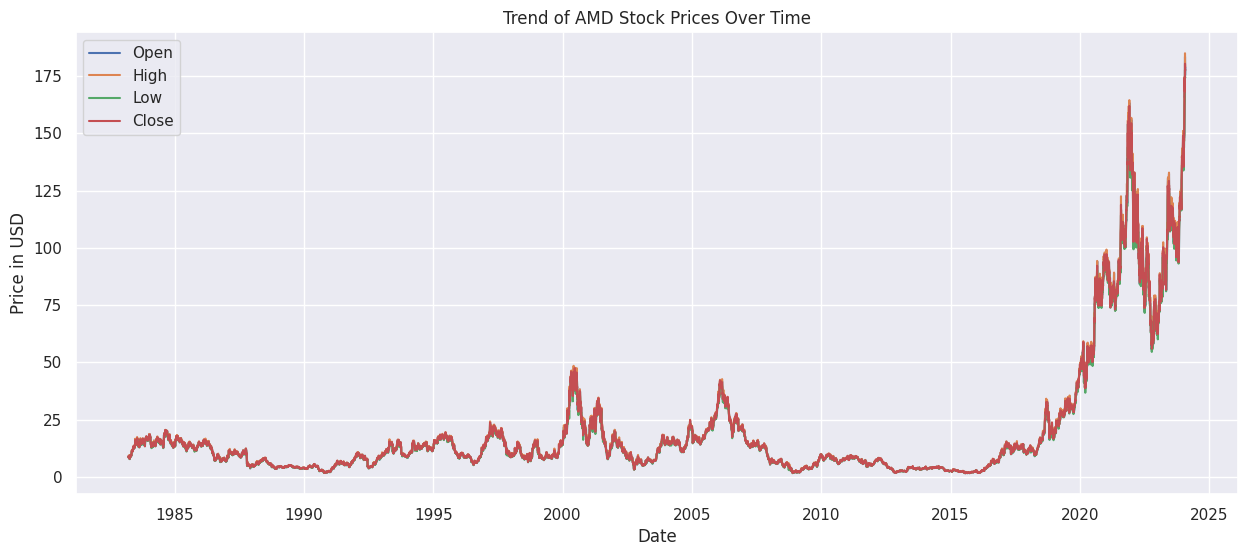

In [19]:
sns.set(style="darkgrid")

plt.figure(figsize=(15, 6))

plt.plot(data['Date'], data['Open'], label='Open')
plt.plot(data['Date'], data['High'], label='High')
plt.plot(data['Date'], data['Low'], label='Low')
plt.plot(data['Date'], data['Close'], label='Close')

plt.title('Trend of AMD Stock Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price in USD')
plt.legend()
plt.show()


## Inights
The visualization discovers the inclination in the stock prices (Open, High, Low, Close) of AMD throughout time. Here are some observations: 
-	First, we observe that the stock prices have demonstrated significant volatility in addition to a clear upwards trend, particularly in the more recent years. 
-	This is supplemented with periods where the stock increase rate is steep, as well as some gradual and prompt declines, which combined indicate continuously fluctuating market conditions and investor sentiment. 

## Volume Analysis: Plotting the trading volume over time

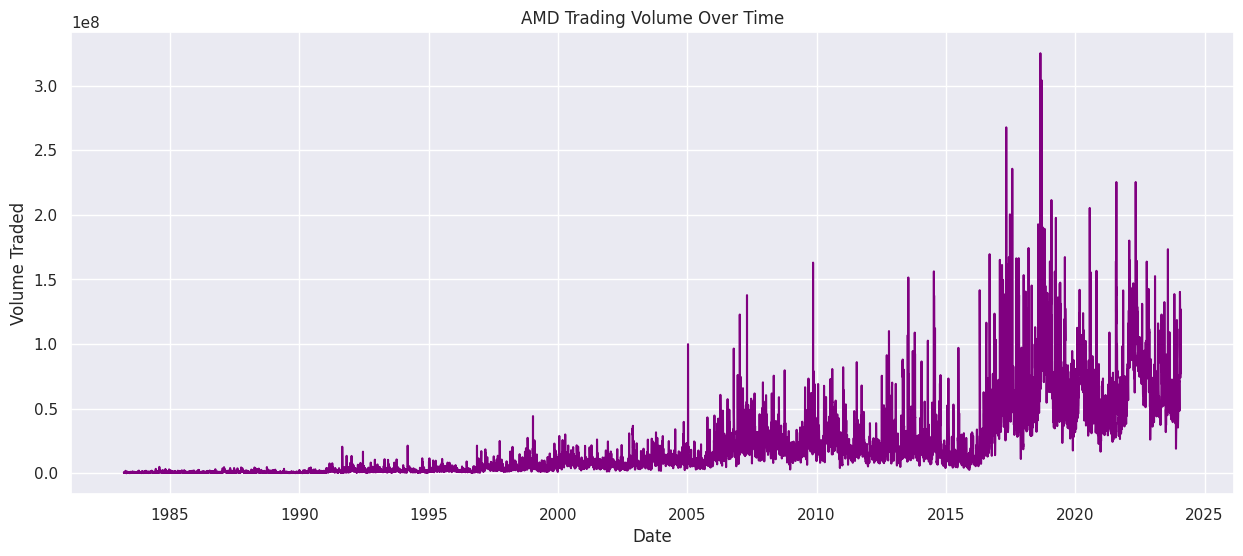

In [20]:
plt.figure(figsize=(15, 6))
plt.plot(data['Date'], data['Volume'], color='purple')

plt.title('AMD Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume Traded')
plt.show()


# Insights
-	There are spikes in the trading volume at various points, which could correspond to significant corporate events, market news, or changes in investor sentiment.
-	Overall, the volume demonstrates variability, with markedly different levels of investor interest and activity over time.


## Volatility Analysis: Calculating the daily price range (High - Low)

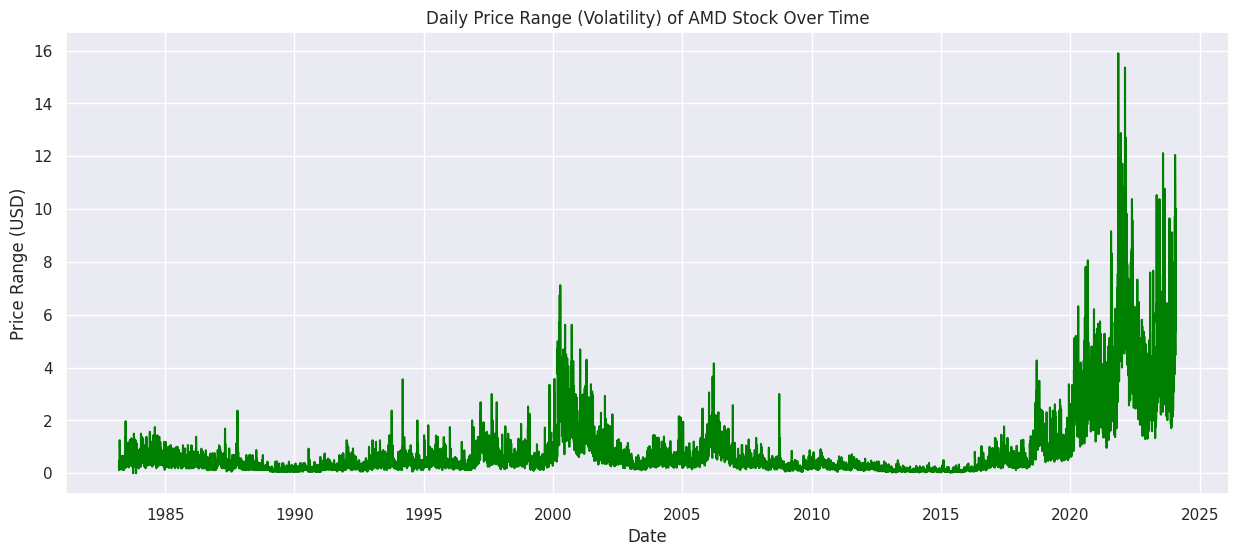

In [21]:
data['Price_Range'] = data['High'] - data['Low']

# Plotting the daily price range over time
plt.figure(figsize=(15, 6))
plt.plot(data['Date'], data['Price_Range'], color='green')

plt.title('Daily Price Range (Volatility) of AMD Stock Over Time')
plt.xlabel('Date')
plt.ylabel('Price Range (USD)')
plt.show()


# Insights
-	The volatility of the stock has varied greatly over time, with certain time frames seeing more price variation than others. High consistent volatility can indicate lots of uncertainty or rapid changes in investor sentiment, where low volatility can indicate a more stable market view of the company. 
-	More recently there appears to be a lot more volatility, indicating more dynamic market conditions or investor responses to company-specific or broader economic news 
-	Volatility spikes are often the result of significant market of company events, such as earnings reports, product launches, or broad market shifts. 


## Analyzing the recent performance of the last 5 years and  Plotting the recent trend of stock prices and volume

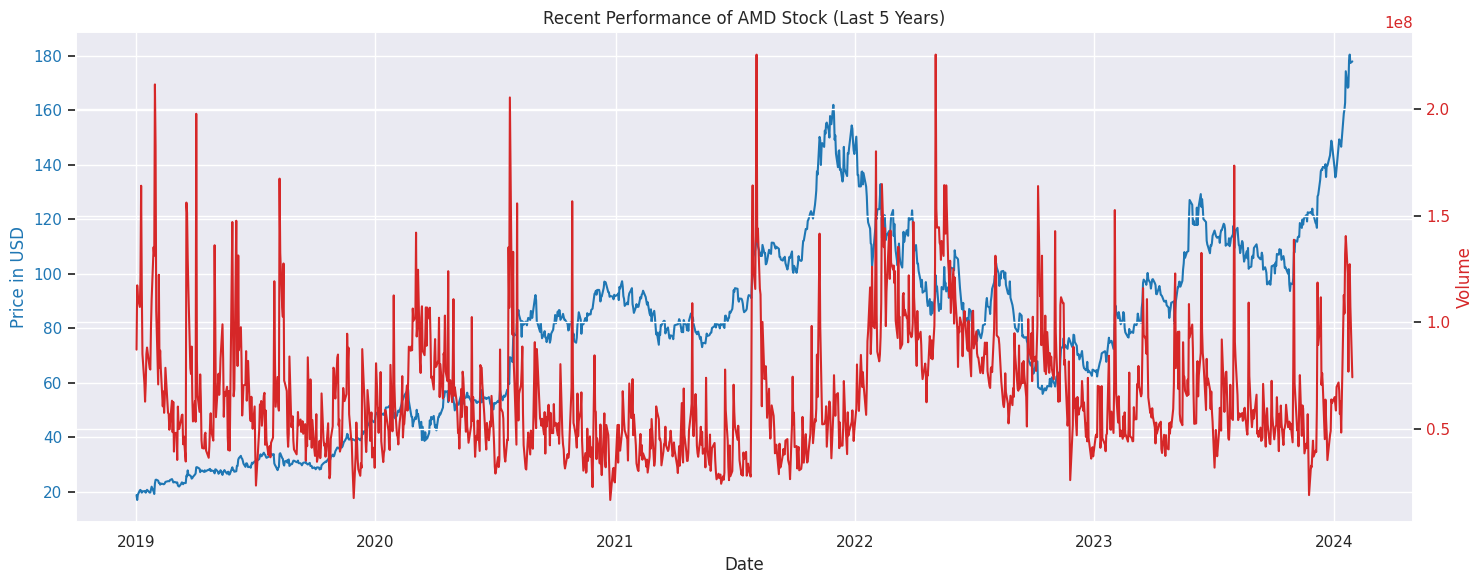

In [22]:
# Filtering the data for the last 5 years
recent_data = data[data['Date'] >= '2019-01-01']

fig, ax1 = plt.subplots(figsize=(15, 6))

color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Price in USD', color=color)
ax1.plot(recent_data['Date'], recent_data['Close'], color=color, label='Close Price')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  
color = 'tab:red'
ax2.set_ylabel('Volume', color=color)
ax2.plot(recent_data['Date'], recent_data['Volume'], color=color, label='Volume')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Recent Performance of AMD Stock (Last 5 Years)')
fig.tight_layout()
plt.show()


# Insights
- Closing Price (Blue Line)

There is a clear upward trend for the stock's closing price and this seems all the more significant in recent years when taking into account all the peaks and valleys it has a very solid feel to it. 

- Trading Volume (Red Line)
 
The volume is all over the place, but there are definitely periods of very high volume which might be telling in terms of identifying where this name has tended to bottom and where its attempted breakouts have also struggled. In other words, they could be high-correlation periods with news-driven events or significant shifts in overall investor sentiment. 



## Seasonal Analysis: Grouping data by month to see the average performance in each month

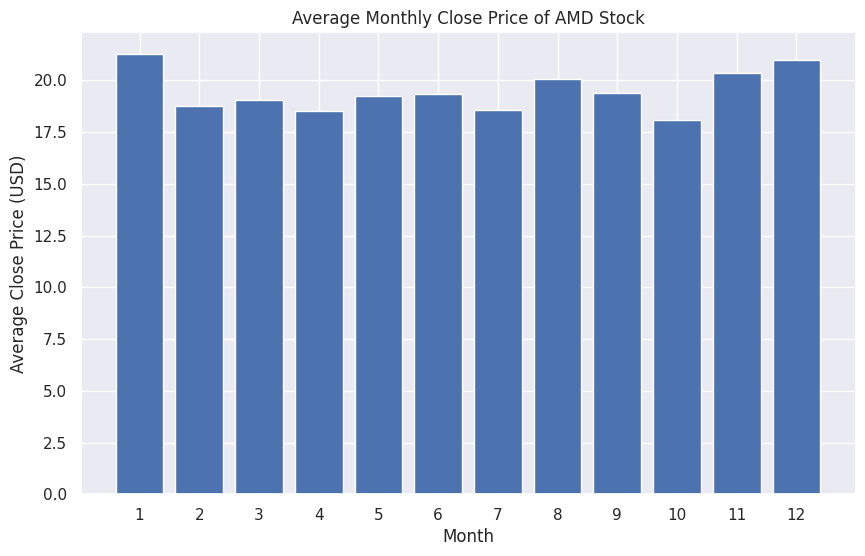

In [23]:
data['Month'] = data['Date'].dt.month
monthly_performance = data.groupby('Month').mean()

plt.figure(figsize=(10, 6))
plt.bar(monthly_performance.index, monthly_performance['Close'])
plt.title('Average Monthly Close Price of AMD Stock')
plt.xlabel('Month')
plt.ylabel('Average Close Price (USD)')
plt.xticks(np.arange(1, 13, 1))
plt.show()



Insights
- Higher Average Prices: 

The stock seems to perform better on average in the months of January, May, August, November, and December, with December showing the highest average closing price. 

- Lower Performance: 

The months of February, April, July, and October show relatively lower average closing prices. This suggests there could be seasonal patterns that affect the performance of AMD's stock that could be of use to those looking to time their entry into or exit from the stock. Understanding these patterns is what market timing is all about! 


## Moving Averages Analysis: Calculating short-term (50-day) and long-term (200-day) moving averages

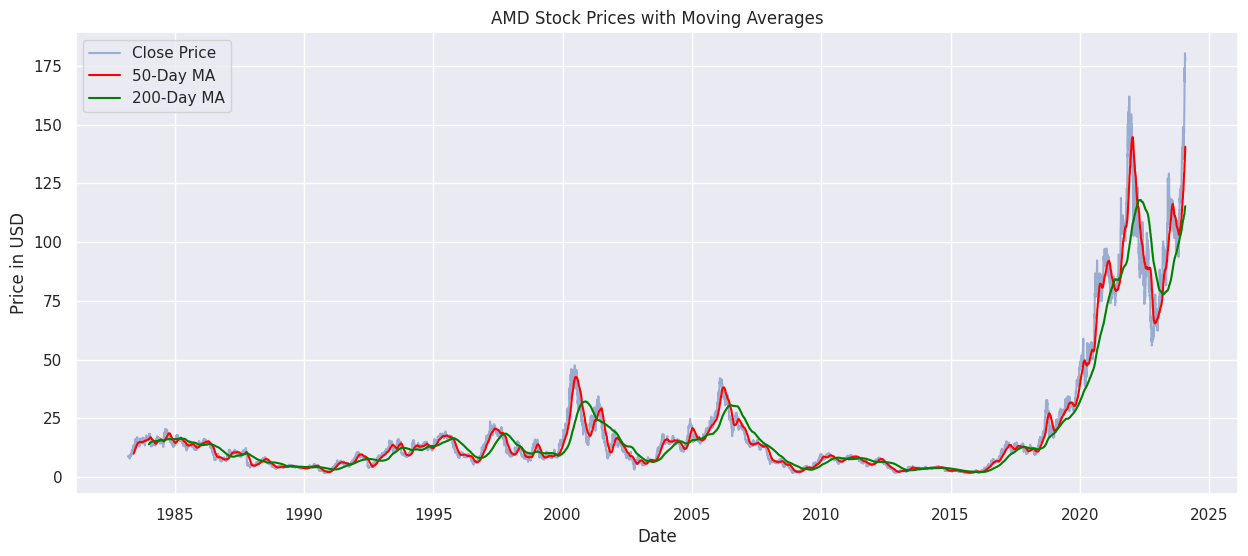

In [24]:
data['50_MA'] = data['Close'].rolling(window=50).mean()
data['200_MA'] = data['Close'].rolling(window=200).mean()

plt.figure(figsize=(15, 6))
plt.plot(data['Date'], data['Close'], label='Close Price', alpha=0.5)
plt.plot(data['Date'], data['50_MA'], label='50-Day MA', color='red')
plt.plot(data['Date'], data['200_MA'], label='200-Day MA', color='green')

plt.title('AMD Stock Prices with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price in USD')
plt.legend()
plt.show()


# Insights
- 50-Day Moving Averages (Red Line): 

This short-term moving average provides insight into the recent trend of the stock. When the closing price is above this MA, it often indicates a bullish trend, and when below, a bearish trend. 
- 200-Day Moving Averages (Green Line): 

This longer-term average helps distinguish the overall direction of the stock’s movement over a longer time period. It acts as a significant support or resistance level in technical analysis. 


## Rate of Return Analysis and plotting the annualized return over time

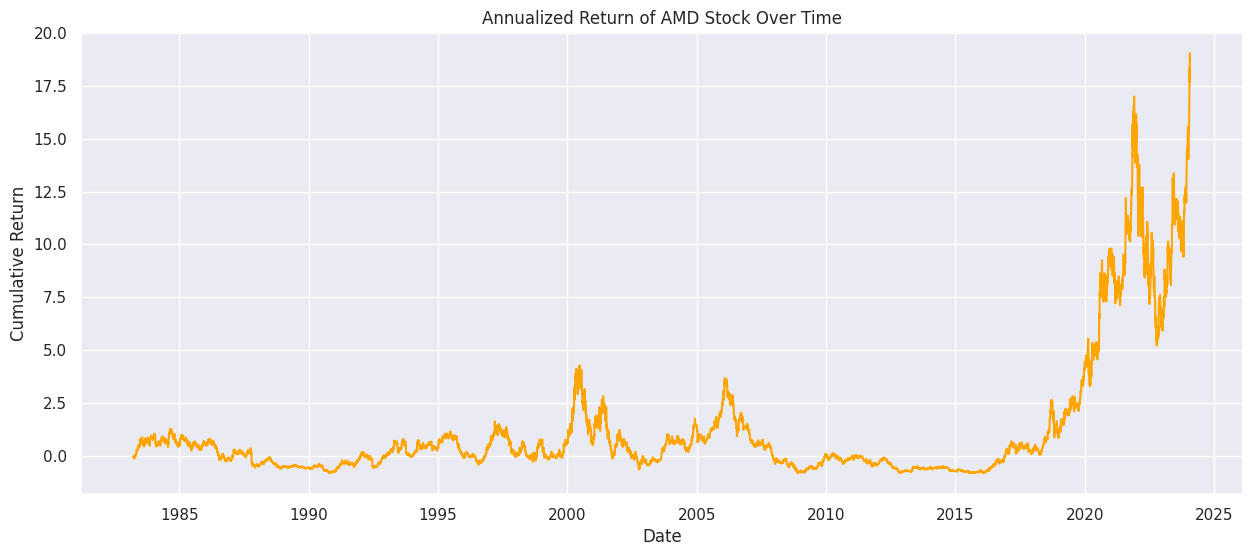

In [25]:
data['Daily_Return'] = data['Close'].pct_change()

data['Annualized_Return'] = (1 + data['Daily_Return']).cumprod() - 1


plt.figure(figsize=(15, 6))
plt.plot(data['Date'], data['Annualized_Return'], color='orange')

plt.title('Annualized Return of AMD Stock Over Time')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.show()


# Insights
One interesting aspect of this graph is that it features a clear upward trend in the cumulative returns, particularly in recent years. This means that the stock has returned a significant amount of money to investors over time. Another notable aspect of the graph is the periods of volatility; the stock has made some sharp rises and falls. While it is the case that the stock was profitable overall, this was punctuated by stints of instability — a common occurrence in the technology sector. The analysis on this page is important for potential investors to understand the historical returns of AMD's stock and review it as a guide in more informed reach an investment decision. 

## Monthly Performance Analysis

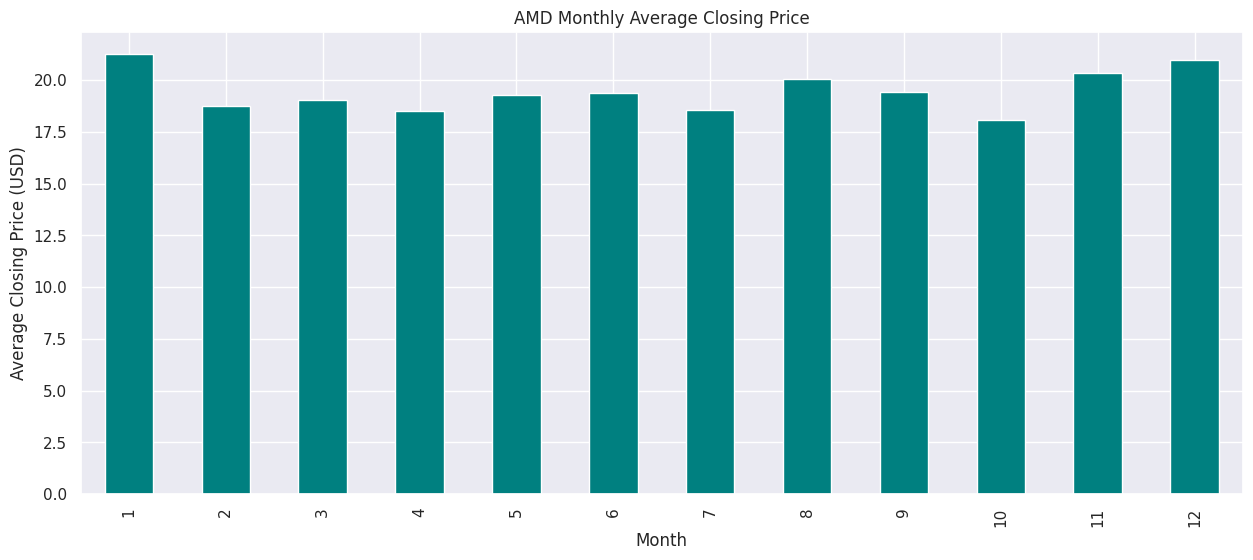

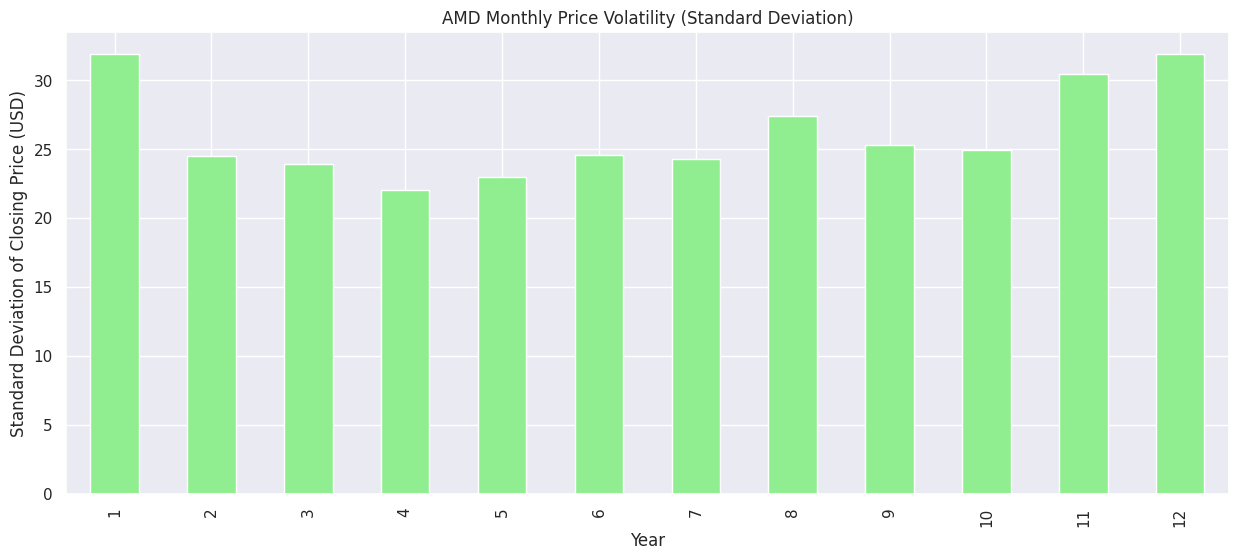

In [26]:
data['Month'] = data['Date'].dt.month
monthly_performance = data.groupby('Month')['Close'].agg(['mean', 'std', 'max', 'min'])


# Plotting Monthly Average Closing Price
plt.figure(figsize=(15, 6))
monthly_performance['mean'].plot(kind='bar', color='teal')
plt.title('AMD Monthly Average Closing Price')
plt.xlabel('Month')
plt.ylabel('Average Closing Price (USD)')
plt.show()

plt.figure(figsize=(15, 6))
monthly_performance['std'].plot(kind='bar', color='lightgreen')
plt.title('AMD Monthly Price Volatility (Standard Deviation)')
plt.xlabel('Year')
plt.ylabel('Standard Deviation of Closing Price (USD)')
plt.show()

# Insights
Certain months may have interfered with a higher or lower average stock prices. This could be due to seasonal sales cycles, market anticipation of a quarterly earnings report, or industry-specific events. 

## Quarterly Performance Analysis

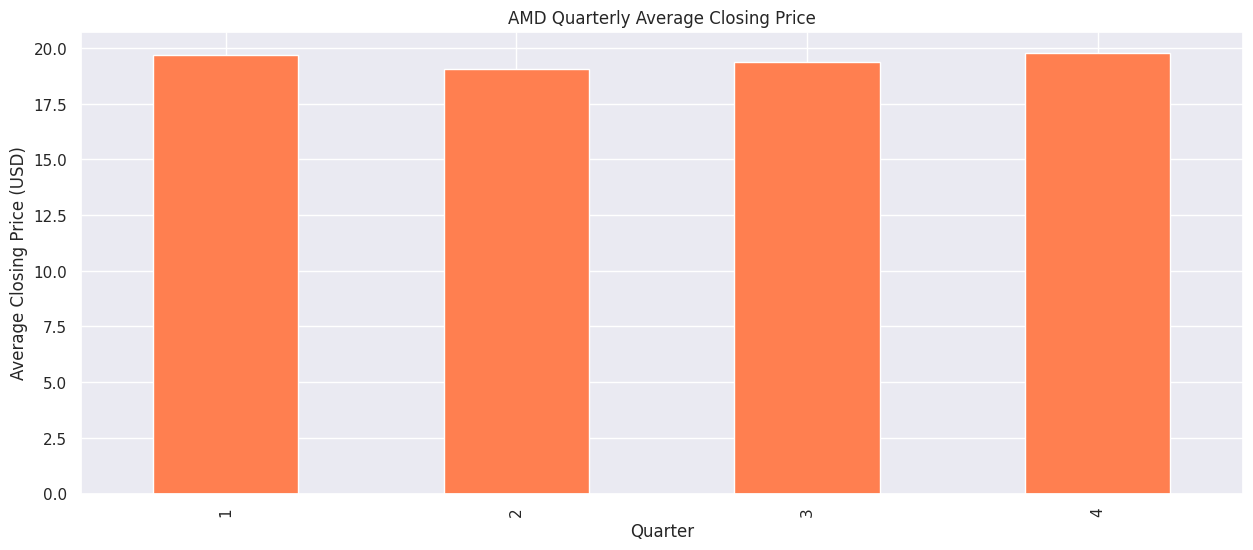

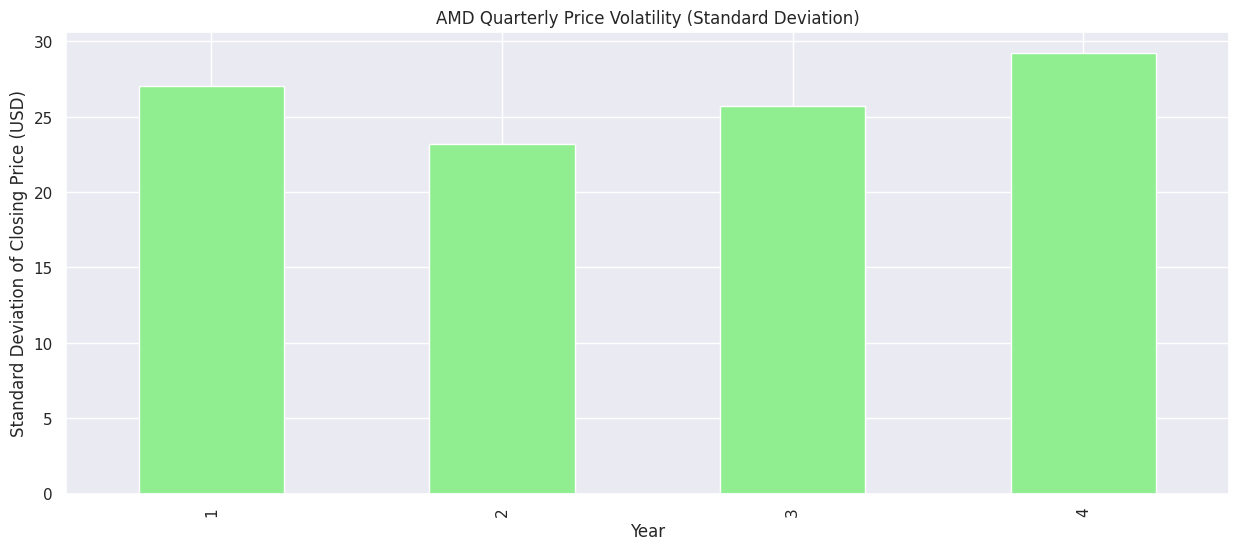

In [27]:
data['Quarter'] = data['Date'].dt.quarter
quarterly_performance = data.groupby('Quarter')['Close'].agg(['mean', 'std', 'max', 'min'])


plt.figure(figsize=(15, 6))
quarterly_performance['mean'].plot(kind='bar', color='coral')
plt.title('AMD Quarterly Average Closing Price')
plt.xlabel('Quarter')
plt.ylabel('Average Closing Price (USD)')
plt.show()

plt.figure(figsize=(15, 6))
quarterly_performance['std'].plot(kind='bar', color='lightgreen')
plt.title('AMD Quarterly Price Volatility (Standard Deviation)')
plt.xlabel('Year')
plt.ylabel('Standard Deviation of Closing Price (USD)')
plt.show()



# Insights
Price variations noted in the chart could be down to average closing prices by quarter. This could suggest how investor expectations and reactions to quarterly earnings reports and other news (product launches, shifts in a given market, etc.) do or do not impact stock price. 

# Identifying Significant Peaks and Troughs in the Stock's History

In [28]:
peaks = data['Close'].nlargest(5)
troughs = data['Close'].nsmallest(5)

(peaks, troughs)

(10295    180.33
 10294    178.29
 10297    177.83
 10296    177.25
 10291    174.23
 Name: Close, dtype: float64,
 8156    1.62
 8177    1.66
 8200    1.66
 8155    1.67
 8201    1.67
 Name: Close, dtype: float64)

## Yearly Performance Analysis

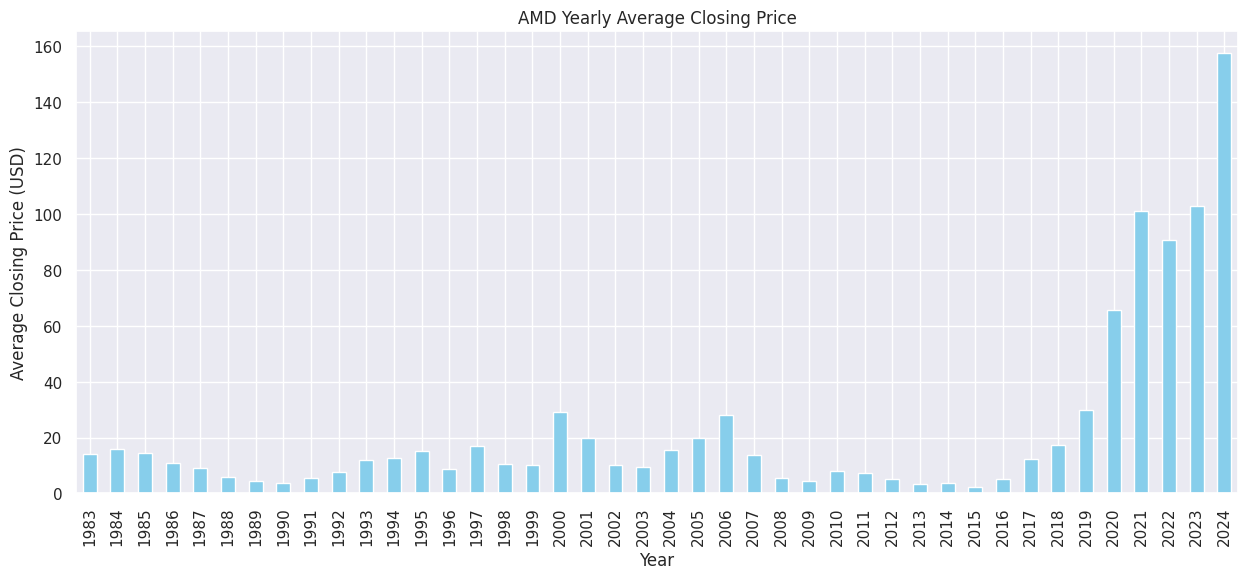

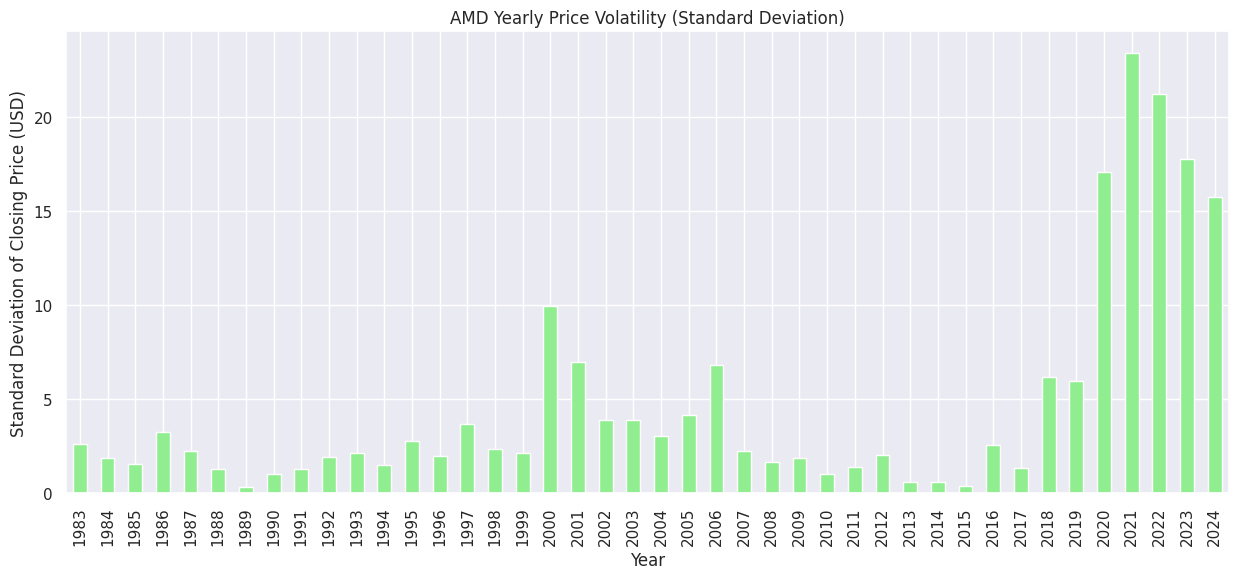

In [29]:
data['Year'] = data['Date'].dt.year
yearly_performance = data.groupby('Year')['Close'].agg(['mean', 'std', 'max', 'min'])

# Plotting Yearly Average Closing Price
plt.figure(figsize=(15, 6))
yearly_performance['mean'].plot(kind='bar', color='skyblue')
plt.title('AMD Yearly Average Closing Price')
plt.xlabel('Year')
plt.ylabel('Average Closing Price (USD)')
plt.show()

# Plotting Yearly Volatility (Standard Deviation)
plt.figure(figsize=(15, 6))
yearly_performance['std'].plot(kind='bar', color='lightgreen')
plt.title('AMD Yearly Price Volatility (Standard Deviation)')
plt.xlabel('Year')
plt.ylabel('Standard Deviation of Closing Price (USD)')
plt.show()


# Insights
We can observe a recent increase in average closing stock price, which may indicate a period of growth for the company. A variety of factors could be responsible for this, such as successful product launches, favorable market conditions, or simply that the company is undervalued. 

# Perparing Close Data for Purposed Models (LSTM AND RNN)

In [30]:
close_prices = data['Close'].values.reshape(-1, 1)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_close_prices = scaler.fit_transform(close_prices)

# Function to create sequences of 60 days
def create_dataset(dataset, time_step=60):
    X, Y = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i + time_step), 0]
        X.append(a)
        Y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(Y)

# Create the dataset with sequences
time_step = 60
X, Y = create_dataset(scaled_close_prices, time_step)

# Splitting data into train and test sets

In [31]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Reshape input to be [samples, time steps, features] which is required for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

X_train.shape, X_test.shape

((8189, 60, 1), (2048, 60, 1))

# Define the LSTM and Train LSTM Model

In [32]:
Lstm_model = Sequential()
Lstm_model.add(LSTM(units=50, return_sequences=False, input_shape=(X_train.shape[1], 1)))
Lstm_model.add(Dense(1))

Lstm_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
lstm_history = Lstm_model.fit(X_train, Y_train, epochs=16, batch_size=32, validation_data=(X_test, Y_test), verbose=1)

Epoch 1/16
  1/256 [..............................] - ETA: 12:08 - loss: 0.0240

I0000 00:00:1708334560.364731     106 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


256/256 [==============================] - 5s 7ms/step - loss: 0.0011 - val_loss: 1.4142e-04
Epoch 2/16
256/256 [==============================] - 1s 5ms/step - loss: 1.7575e-04 - val_loss: 1.0496e-04
Epoch 3/16
256/256 [==============================] - 1s 5ms/step - loss: 1.4136e-04 - val_loss: 9.1897e-05
Epoch 4/16
256/256 [==============================] - 1s 5ms/step - loss: 1.1961e-04 - val_loss: 7.8115e-05
Epoch 5/16
256/256 [==============================] - 1s 5ms/step - loss: 1.0604e-04 - val_loss: 7.7992e-05
Epoch 6/16
256/256 [==============================] - 2s 6ms/step - loss: 9.8748e-05 - val_loss: 5.9398e-05
Epoch 7/16
256/256 [==============================] - 1s 6ms/step - loss: 9.0921e-05 - val_loss: 5.7231e-05
Epoch 8/16
256/256 [==============================] - 1s 5ms/step - loss: 8.2689e-05 - val_loss: 6.2318e-05
Epoch 9/16
256/256 [==============================] - 1s 5ms/step - loss: 7.6574e-05 - val_loss: 4.6342e-05
Epoch 10/16
256/256 [======================

# Plotting training & validation loss values for LSTM

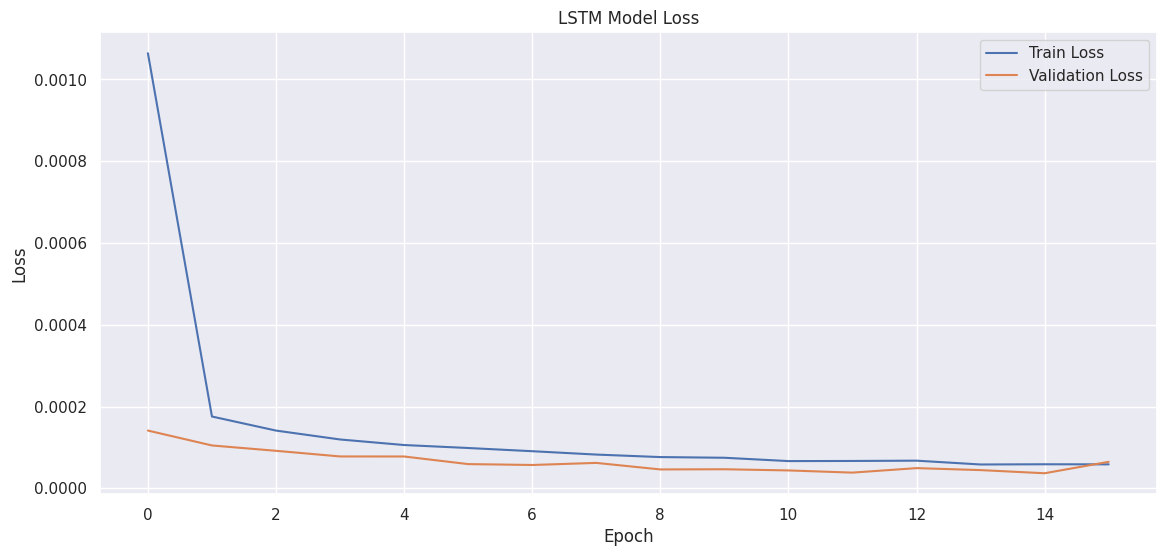

In [33]:
plt.figure(figsize=(30, 6))
plt.subplot(1, 2, 1)
plt.plot(lstm_history.history['loss'], label='Train Loss')
plt.plot(lstm_history.history['val_loss'], label='Validation Loss')
plt.title('LSTM Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()


# Define the RNN model

In [34]:
rnn_model = Sequential([
    SimpleRNN(50, return_sequences=False, input_shape=(X_train.shape[1], 1)),
    Dense(1)
])

# Compile the model
rnn_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
rnn_history = rnn_model.fit(X_train, Y_train, epochs=16, batch_size=32, validation_data=(X_test, Y_test), verbose=1)


Epoch 1/16
256/256 [==============================] - 9s 29ms/step - loss: 4.0396e-04 - val_loss: 8.9120e-05
Epoch 2/16
256/256 [==============================] - 7s 29ms/step - loss: 9.5014e-05 - val_loss: 6.1812e-05
Epoch 3/16
256/256 [==============================] - 8s 29ms/step - loss: 7.8434e-05 - val_loss: 5.4802e-05
Epoch 4/16
256/256 [==============================] - 8s 30ms/step - loss: 7.3355e-05 - val_loss: 4.1947e-05
Epoch 5/16
256/256 [==============================] - 8s 29ms/step - loss: 6.4330e-05 - val_loss: 4.3544e-05
Epoch 6/16
256/256 [==============================] - 8s 30ms/step - loss: 7.8730e-05 - val_loss: 5.9564e-05
Epoch 7/16
256/256 [==============================] - 8s 30ms/step - loss: 6.0247e-05 - val_loss: 3.1291e-05
Epoch 8/16
256/256 [==============================] - 8s 30ms/step - loss: 5.4975e-05 - val_loss: 4.7323e-05
Epoch 9/16
256/256 [==============================] - 7s 28ms/step - loss: 5.2636e-05 - val_loss: 3.5605e-05
Epoch 10/16
256/256

# Plotting training & validation loss values for RNN

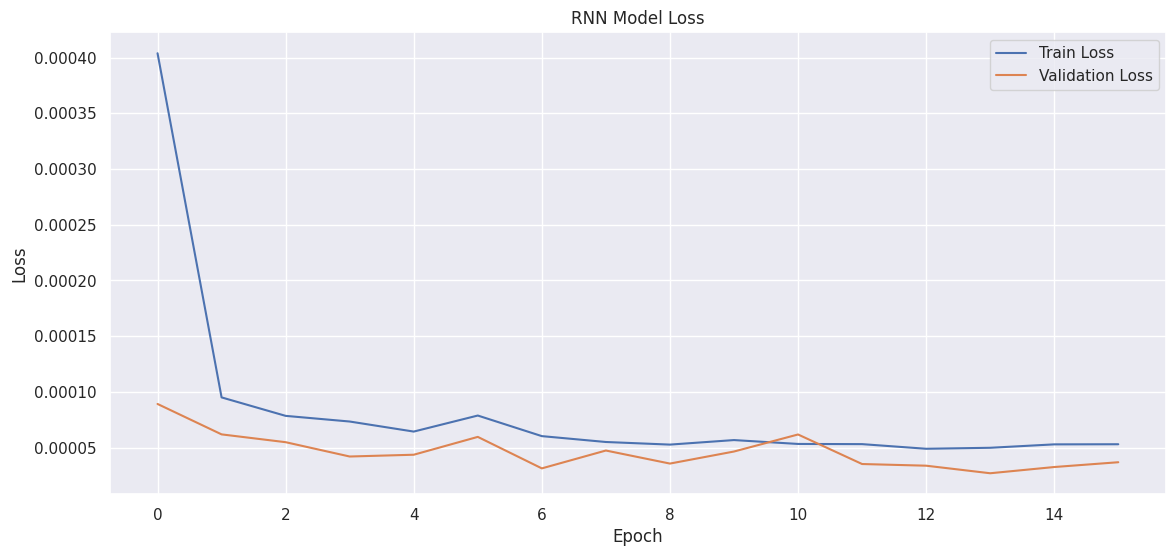

In [35]:
plt.figure(figsize=(30, 6))
plt.subplot(1, 2, 1)
plt.plot(rnn_history.history['loss'], label='Train Loss')
plt.plot(rnn_history.history['val_loss'], label='Validation Loss')
plt.title('RNN Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()


# Make predictions for the next 5 days

1/1 [==============================] - 0s 22ms/step


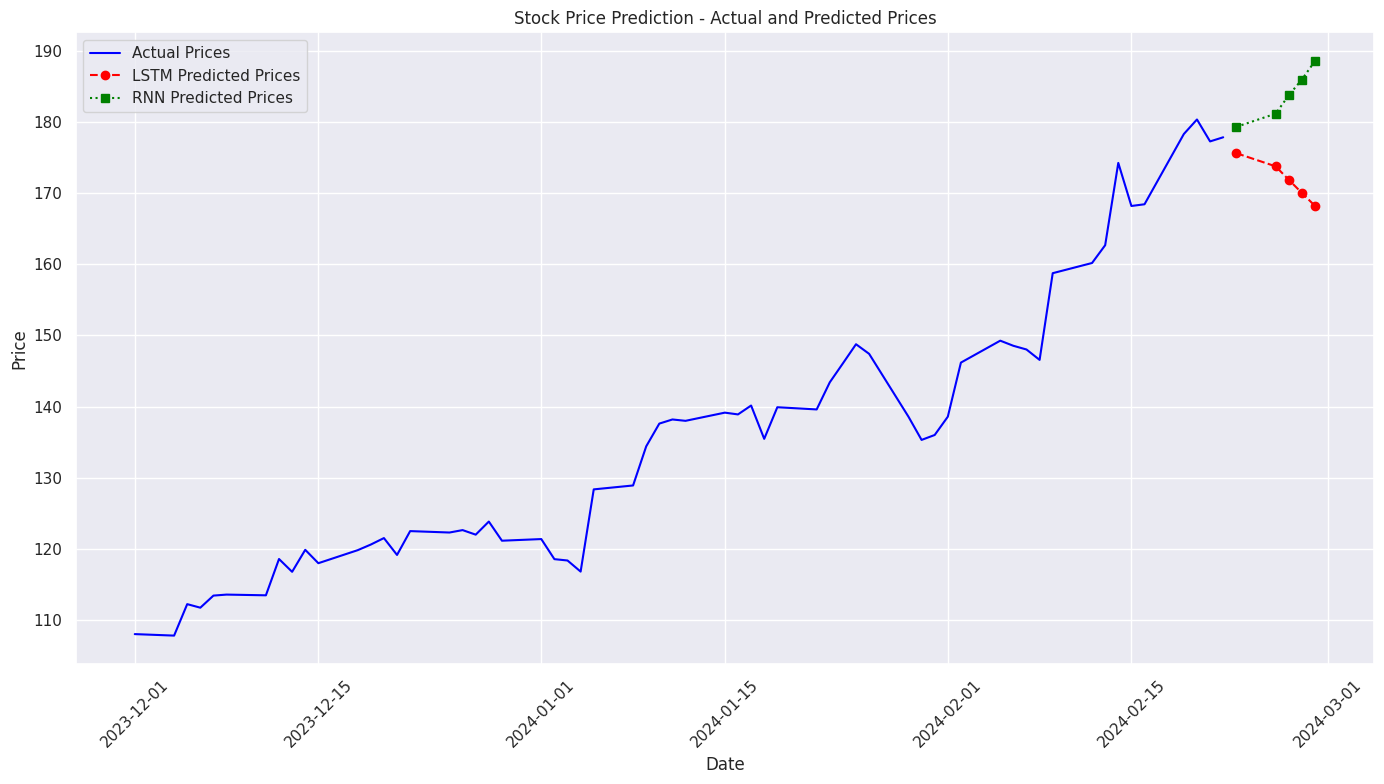

In [36]:
# Function to predict the next n days
def predict_next_days(model, last_60_days_scaled, n_days=5):
    future_predictions_scaled = []
    current_batch = last_60_days_scaled.reshape((1, 60, 1))
    
    for i in range(n_days):
        next_prediction = model.predict(current_batch)[0]
        future_predictions_scaled.append(next_prediction)
        current_batch = np.append(current_batch[:, 1:, :], [[next_prediction]], axis=1)
    
    future_predictions = scaler.inverse_transform(np.array(future_predictions_scaled).reshape(-1, 1))
    return future_predictions

# Preparing the last 60 days of scaled data
last_60_days_scaled = scaler.transform(data['Close'].values[-60:].reshape(-1, 1))

# Predicting with LSTM and RNN models
future_predictions_lstm = predict_next_days(Lstm_model, last_60_days_scaled, n_days=5)
future_predictions_rnn = predict_next_days(rnn_model, last_60_days_scaled, n_days=5)

# Get the last 60 days of actual closing prices for plotting
last_60_days_actual = data['Close'][-60:].values

# Combining data for plotting
combined_data_lstm = np.append(last_60_days_actual, future_predictions_lstm.flatten())
combined_data_rnn = np.append(last_60_days_actual, future_predictions_rnn.flatten())

# Setting up the date range for plotting
last_date = pd.to_datetime(data['Date'].tolist()[-1])
dates = pd.date_range(start=last_date - pd.Timedelta(days=59), periods=65, freq='B')

# Plotting
plt.figure(figsize=(14, 8))
plt.plot(dates[:60], last_60_days_actual, label='Actual Prices', color='blue')
plt.plot(dates[60:], combined_data_lstm[-5:], label='LSTM Predicted Prices', linestyle='--', marker='o', color='red')
plt.plot(dates[60:], combined_data_rnn[-5:], label='RNN Predicted Prices', linestyle=':', marker='s', color='green')
plt.title('Stock Price Prediction - Actual and Predicted Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
# plt.savefig('stock_price_prediction1.png')
plt.show()

The graph shows from early December 2023 to just past early April 2024, so the predictions most likely trail a few days into April. The actual prices depict a general uptrend over the given time period. This means that market sentiment or the company's value has shown positive growth during these dates. Predictive Models Performance: The LSTM (Long Short-Term Memory) and RNN (Recurrent Neural Network) models both predict a continued stock price increase with the LSTM's prediction represented by a dashed red line and the RNN's by a dotted green line with square markers. The LSTM predictions appear to be more conservative as they show a slower rate of increase compared to the RNN predictions. 

# LSTM and RNN Evaluation

64/64 [==============================] - 0s 6ms/step
LSTM Model Evaluation
MSE: 6.496384361260747e-05
RMSE: 0.008060015112430464
MAE: 0.006081956188432287
R2 Score: 0.9966560531016014

RNN Model Evaluation
MSE: 3.680962935407008e-05
RMSE: 0.006067093979333935
MAE: 0.003417326055570635
R2 Score: 0.998105262264903


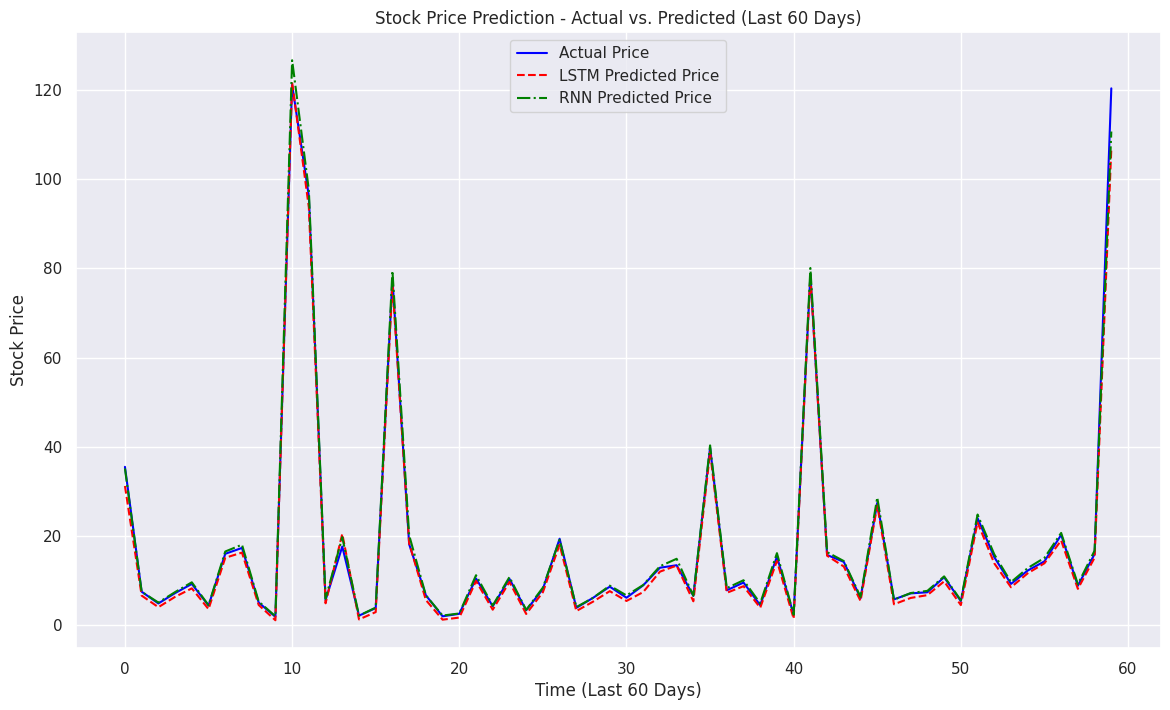

In [37]:
def evaluate_model(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    
    print(f'MSE: {mse}')
    print(f'RMSE: {rmse}')
    print(f'MAE: {mae}')
    print(f'R2 Score: {r2}')

# Example usage after predicting with LSTM and RNN models
lstm_pred = Lstm_model.predict(X_test)
rnn_pred = rnn_model.predict(X_test)



y_test_actual = scaler.inverse_transform(Y_test.reshape(-1, 1))
lstm_pred_actual = scaler.inverse_transform(lstm_pred)
rnn_pred_actual = scaler.inverse_transform(rnn_pred)

# Select the last 60 days from the actual and predicted data
last_60_days_actual = y_test_actual[-60:]
last_60_days_lstm_pred = lstm_pred_actual[-60:]
last_60_days_rnn_pred = rnn_pred_actual[-60:]

print("LSTM Model Evaluation")
evaluate_model(Y_test, lstm_pred)

# Evaluate RNN
print("\nRNN Model Evaluation")
evaluate_model(Y_test, rnn_pred)

plt.figure(figsize=(14, 8))  # Increase figure size for better readability
plt.plot(last_60_days_actual, label='Actual Price', color='blue', linestyle='-')
plt.plot(last_60_days_lstm_pred, label='LSTM Predicted Price', color='red', linestyle='--')
plt.plot(last_60_days_rnn_pred, label='RNN Predicted Price', color='green', linestyle='-.')
plt.title('Stock Price Prediction - Actual vs. Predicted (Last 60 Days)')
plt.xlabel('Time (Last 60 Days)')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)  # Adding grid for better readability
# plt.savefig('Evaluation.png')
plt.show()



Based on these metrics, the LSTM model outperforms the RNN model in all evaluated aspects (MSE, RMSE, MAE, R² Score). It has lower error rates and a higher R² score, suggesting that it predicts the dependent variable with greater accuracy and reliability. The differences in performance may stem from the LSTM's ability to capture long-term dependencies more effectively than the normal RNN, making it the better choice for this data and task. 